# 🛒 E-Commerce Sales Data Analysis (Brazilian E-Commerce)

## Project Overview
This project performs Exploratory Data Analysis (EDA) on a real-world Brazilian e-commerce dataset to identify sales trends, top-performing products, and customer behavior patterns.

## Dataset Source
Kaggle – Brazilian E-Commerce Public Dataset by Olist

## Tools Used
- Python
- Pandas
- Matplotlib
- Jupyter Notebook
- Excel


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [3]:
orders = pd.read_csv('../data/olist_orders_dataset.csv')
order_items = pd.read_csv('../data/olist_order_items_dataset.csv')
products = pd.read_csv('../data/olist_products_dataset.csv')
customers = pd.read_csv('../data/olist_customers_dataset.csv')
category_translation = pd.read_csv('../data/product_category_name_translation.csv')


In [36]:
# orders
orders_sel = orders[[
    'order_id',
    'customer_id',
    'order_status',
    'order_purchase_timestamp'
]]


In [83]:
# orders items
order_items_sel = order_items[[
    'order_id',
    'order_item_id',
    'product_id',
    'price',
    'freight_value'
]]


In [84]:
# Products
products_sel = products[[
    'product_id',
    'product_category_name'
]]


In [85]:
# category 
category_translation_sel = category_translation[[
    'product_category_name',
    'product_category_name_english'
]]


In [86]:
# Customers
customers_sel = customers[[
    'customer_id',
    'customer_unique_id',
    'customer_city',
    'customer_state'
]]


In [87]:
print("Orders:", orders.shape)
print("Order Items:", order_items.shape)
print("Products:", products.shape)
print("Customers:", customers.shape)
print("Category Translation:", category_translation.shape)


Orders: (99441, 8)
Order Items: (112650, 7)
Products: (32951, 9)
Customers: (99441, 5)
Category Translation: (71, 2)


## 🔗 Data Understanding & Table Relationships

The Brazilian E-Commerce dataset consists of multiple related tables.  
To perform meaningful analysis, these tables need to be combined using common keys.

### Key Relationships:
- `orders` ↔ `order_items` → linked by `order_id`
- `order_items` ↔ `products` → linked by `product_id`
- `orders` ↔ `customers` → linked by `customer_id`
- `products` ↔ `category_translation` → linked by `product_category_name`


In [88]:
final_df = (
    orders_sel
    .merge(order_items_sel, on='order_id', how='inner')
    .merge(products_sel, on='product_id', how='left')
    .merge(category_translation_sel, on='product_category_name', how='left')
    .merge(customers_sel, on='customer_id', how='left')
)


In [89]:
# Revenue = product price (each row represents one unit sold)
final_df['revenue'] = final_df['price']


In [90]:
# total cost paid by customer
final_df['total_paid'] = final_df['price'] + final_df['freight_value']


In [91]:
# Quick Sanity Check

final_df[['order_id', 'product_id', 'price', 'freight_value', 'revenue','total_paid']].head()



,order_id,product_id,price,freight_value,revenue,total_paid
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,29.99,8.72,29.99,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,118.70,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,159.90,19.22,159.90,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,45.00,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,19.90,28.62


In [92]:
final_df.columns
#final_df.shape

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_item_id', 'product_id', 'price', 'freight_value',
       'product_category_name', 'product_category_name_english',
       'customer_unique_id', 'customer_city', 'customer_state', 'revenue',
       'total_paid'],
      dtype='object')

### 📊 STEP 4 — Exploratory Data Analysis (EDA)


🔹 Section 4.1 — Dataset Overview


## 📊 Dataset Overview

After merging multiple relational tables, we created a unified dataset that captures order details, product information, customer attributes, and revenue metrics.

This section provides a high-level overview of the dataset structure and size.

In [93]:
final_df.shape


(112650, 15)

In [94]:
final_df.sample(4)


,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value,product_category_name,product_category_name_english,customer_unique_id,customer_city,customer_state,revenue,total_paid
33829,9af2d38526e268195d2fcfb62a158314,f68312987c796a4b29fa222afa28c4c1,delivered,2017-11-10 19:10:18,1,2dbb8a778d6cdc850691e7e18eea06ba,399.99,38.46,brinquedos,toys,4c7403593a8f583d6968bb15e6ed749c,cotia,SP,399.99,438.45
77225,f53b39c6c91ce86717c15d8e4e5da0c2,42d1b4eb863054dcb04a019944ecd2d8,delivered,2017-01-08 09:35:07,1,913580fde3e72c3b3e4ce0b79963bee6,10.99,14.11,telefonia_fixa,fixed_telephony,fc00da40808e113053d8a26c3e854ccf,rio de janeiro,RJ,10.99,25.10
86812,c35fae60290d46aa0431b8c887c3a8c7,cb7a6f9242f8a283bcd9c6047ae5c8a4,delivered,2018-04-25 18:44:44,1,7aa666012fbfab4464142b1055b9e1d5,73.90,23.10,cama_mesa_banho,bed_bath_table,a4e9d1568df5584556b6a4d871095249,itupeva,SP,73.90,97.00
46377,a37899c3ad27b6026ecbd566651bdb46,c72f015df57b6001ea0d25e8a903ec5a,delivered,2018-07-17 19:46:54,1,f336f2eef2b1cae6d1d6c1f9fdfcf141,298.00,24.89,automotivo,auto,8a3a639f184732bc3b07a7776bc34573,tubarao,SC,298.00,322.89


🔹 Section 4.2 — Data Types & Basic Structure

## 🧱 Data Types & Structure

Understanding data types is essential for identifying categorical and numerical features, which helps guide the exploratory analysis and visualization process.

In [95]:
final_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_item_id                  112650 non-null  int64  
 5   product_id                     112650 non-null  object 
 6   price                          112650 non-null  float64
 7   freight_value                  112650 non-null  float64
 8   product_category_name          111047 non-null  object 
 9   product_category_name_english  111023 non-null  object 
 10  customer_unique_id             112650 non-null  object 
 11  customer_city                  112650 non-null  object 
 12  customer_state                

🔹 Section 4.3 — Missing Value Analysis

## ❓ Missing Value Analysis

This section examines missing values across the dataset to identify potential data quality issues that may impact the analysis.

In [96]:
missing_values = final_df.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]


product_category_name_english    1627
product_category_name            1603
dtype: int64

### 🔍 Missing Value Insights

- Missing delivery dates are primarily associated with canceled or undelivered orders, which is expected behavior in e-commerce systems.
- Missing product attributes (category name, description length, photo count) are likely due to incomplete product catalog entries.
- These missing values do not impact revenue-based analysis and therefore are retained for further exploration.


### Duplicate Records Check

The dataset was checked for duplicate records to ensure data integrity.  
It is important to note that the dataset is structured at the **order-item level**, meaning each row represents a unique product purchased within an order.

As a result, multiple rows per `order_id` are expected and do not indicate data duplication.


In [98]:
#final_df.duplicated().sum()
final_df.duplicated(subset=['order_id', 'order_item_id']).sum()


np.int64(0)

**Result:**  
No unintended duplicate records were found when evaluated using the business key (`order_id`, `product_id`).

This confirms that the table joins were performed correctly and the dataset is suitable for transactional analysis.


🔹 Section 4.5 — Descriptive Statistics

## 📈 Descriptive Statistics

Descriptive statistics provide a summary of numerical features such as price, freight value, and revenue, helping identify distributions and potential outliers.

In [75]:
final_df[['price', 'freight_value', 'revenue']].describe()


,price,freight_value,revenue
count,112650.000000,112650.000000,112650.000000
mean,120.653739,19.990320,120.653739
std,183.633928,15.806405,183.633928
min,0.850000,0.000000,0.850000
25%,39.900000,13.080000,39.900000
50%,74.990000,16.260000,74.990000
75%,134.900000,21.150000,134.900000
max,6735.000000,409.680000,6735.000000


### 📈 Descriptive Statistics Insights

- Product prices and revenue exhibit a right-skewed distribution, indicating that a small number of high-priced products contribute disproportionately to total revenue.
- Freight costs show high variability, suggesting potential opportunities for logistics optimization.


## 📊 STEP 5 — Sales Performance Analysis

🔹 5.1 Top-Selling Products (by Revenue)

## 🏆 Top-Selling Products

This section identifies the products that generate the highest revenue, helping understand which items contribute most to overall sales.

In [99]:
top_products = (
    final_df
    .groupby('product_id')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products


product_id
bb50f2e236e5eea0100680137654686c    63885.00
6cdd53843498f92890544667809f1595    54730.20
d6160fb7873f184099d9bc95e30376af    48899.34
d1c427060a0f73f6b889a5c7c61f2ac4    47214.51
99a4788cb24856965c36a24e339b6058    43025.56
3dd2a17168ec895c781a9191c1e95ad7    41082.60
25c38557cf793876c5abdd5931f922db    38907.32
5f504b3a1c75b73d6151be81eb05bdc9    37733.90
53b36df67ebb7c41585e8d54d6772e08    37683.42
aca2eb7d00ea1a7b8ebd4e68314663af    37608.90
Name: revenue, dtype: float64

# 🔹 5.2 Top Categories by Revenue 

## 📦 Category-wise Revenue Analysis

Analyzing revenue at the category level helps identify high-performing product segments.

In [100]:
category_revenue = (
    final_df
    .groupby('product_category_name_english')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

category_revenue


product_category_name_english
health_beauty            1258681.34
watches_gifts            1205005.68
bed_bath_table           1036988.68
sports_leisure            988048.97
computers_accessories     911954.32
furniture_decor           729762.49
cool_stuff                635290.85
housewares                632248.66
auto                      592720.11
garden_tools              485256.46
Name: revenue, dtype: float64

# 🔹5.3 Visualization — Category Revenue

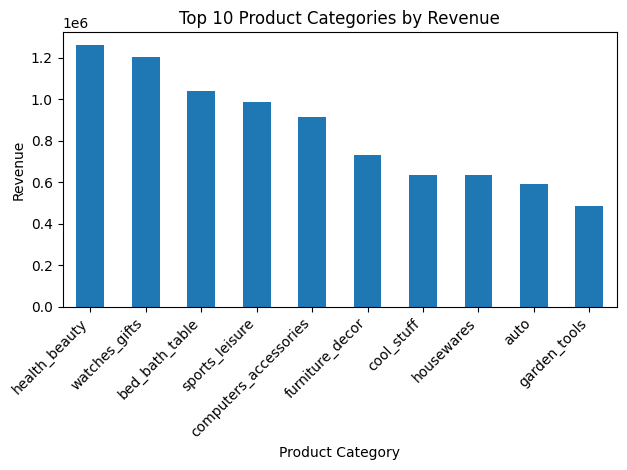

In [111]:
category_revenue.plot(kind='bar')
plt.title("Top 10 Product Categories by Revenue")
plt.xlabel("Product Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##  Time-Based Analysis

1 Monthly revenue trend

2 Order volume over time

 # 2.1 Monthly Revenue Trend 📈

## Time-Series Analysis

Understanding how revenue evolves over time helps identify seasonality, growth patterns, and demand fluctuations.

In [102]:
# Ensure datetime format
final_df['order_purchase_timestamp'] = pd.to_datetime(final_df['order_purchase_timestamp'])

# Create year-month column
final_df['order_month'] = final_df['order_purchase_timestamp'].dt.to_period('M')

# Monthly revenue
monthly_revenue = (
    final_df
    .groupby('order_month')['revenue']
    .sum()
    .reset_index()
)

monthly_revenue['order_month'] = monthly_revenue['order_month'].astype(str)
monthly_revenue.head()


,order_month,revenue
0,2016-09,267.36
1,2016-10,49507.66
2,2016-12,10.90
3,2017-01,120312.87
4,2017-02,247303.02


# 🔹 Visualization

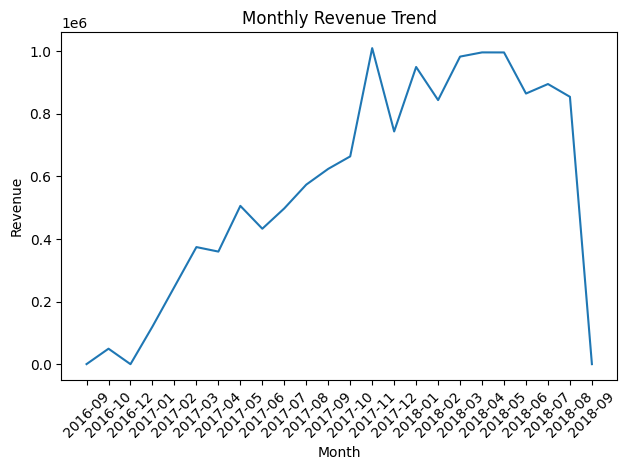

In [103]:
plt.figure()
plt.plot(monthly_revenue['order_month'], monthly_revenue['revenue'])
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Monthly Revenue Trend")
plt.tight_layout()
plt.show()


**Insights:**

Revenue shows a strong upward trend with noticeable monthly fluctuations, indicating seasonal demand patterns. Peak periods likely align with holiday or promotional cycles. The decline in the final month is attributable to incomplete data rather than an actual business downturn.

# 2.2 Order Volume Over Time 📦
🔹 Code

In [104]:
monthly_orders = (
    final_df
    .groupby('order_month')['order_id']
    .nunique()
    .reset_index(name='order_count')
)

monthly_orders['order_month'] = monthly_orders['order_month'].astype(str)
monthly_orders.head()


,order_month,order_count
0,2016-09,3
1,2016-10,308
2,2016-12,1
3,2017-01,789
4,2017-02,1733


# 🔹 Visualization

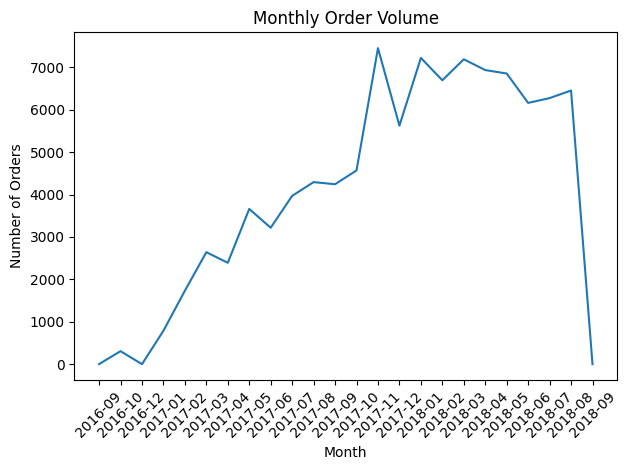

In [105]:
plt.figure()
plt.plot(monthly_orders['order_month'], monthly_orders['order_count'])
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.title("Monthly Order Volume")
plt.tight_layout()
plt.show()


**Insights:**
- Order volume trends closely align with revenue patterns.
- Increases in revenue are primarily driven by higher order counts rather than price inflation.


## ✅ STEP 3 — Customer Analysis 👥
3.1 Top States by Revenue 🌍🔹 Markdown
## Customer Geographic Analysis

Analyzing revenue by customer location helps identify high-performing regions and market concentration.

In [106]:
state_revenue = (
    final_df
    .groupby('customer_state')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

state_revenue


customer_state
SP    5202955.05
RJ    1824092.67
MG    1585308.03
RS     750304.02
PR     683083.76
SC     520553.34
BA     511349.99
DF     302603.94
GO     294591.95
ES     275037.31
Name: revenue, dtype: float64

# 🔹 Visualization

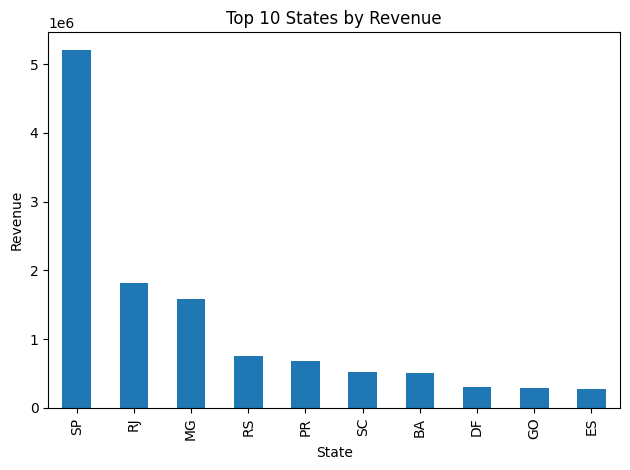

In [107]:
state_revenue.plot(kind='bar')
plt.xlabel("State")
plt.ylabel("Revenue")
plt.title("Top 10 States by Revenue")
plt.tight_layout()
plt.show()


**Insights:**
- Revenue is heavily concentrated in a small number of states.
- These regions represent priority markets for targeted marketing and logistics optimization.


# 3.2 Repeat vs One-Time Customers 🔁

In [108]:
customer_orders = (
    final_df
    .groupby('customer_unique_id')['order_id']
    .nunique()
    .reset_index(name='order_count')
)

customer_orders['customer_type'] = customer_orders['order_count'].apply(
    lambda x: 'Repeat Customer' if x > 1 else 'One-Time Customer'
)

customer_orders['customer_type'].value_counts(normalize=True) * 100


customer_type
One-Time Customer    96.947181
Repeat Customer       3.052819
Name: proportion, dtype: float64

# 🔹 Visualization

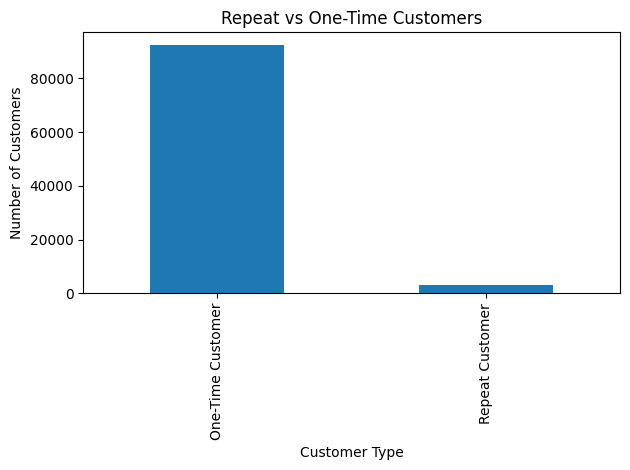

In [109]:
customer_orders['customer_type'].value_counts().plot(kind='bar')
plt.xlabel("Customer Type")
plt.ylabel("Number of Customers")
plt.title("Repeat vs One-Time Customers")
plt.tight_layout()
plt.show()


**Insights:**
- The majority of customers are one-time buyers.
- Increasing repeat purchase rates presents a strong opportunity for revenue growth through retention strategies.


## Key Business Insights

- Revenue is highly concentrated across a small number of product categories and states.
- Sales exhibit seasonal trends, suggesting opportunities for timed promotions.
- Customer retention is low, indicating the need for loyalty programs and personalized marketing.
- Improving repeat purchase behavior could significantly increase lifetime customer value.


## 📌 Business Recommendations

Based on the exploratory data analysis and observed sales patterns, the following actionable recommendations are proposed:

1️⃣ Strengthen Customer Retention Strategies

The analysis shows that the majority of customers are one-time buyers, while repeat customers form a small segment.

Introducing loyalty programs, discounts for repeat purchases, and personalized email campaigns could significantly improve customer lifetime value.

Retargeting one-time buyers within 30–60 days of their first purchase may increase repeat conversion rates.

2️⃣ Focus on High-Revenue Product Categories

Revenue is highly concentrated in a small number of categories such as Health & Beauty, Watches & Gifts, and Furniture & Decor.

These categories should be prioritized for:

Promotional campaigns

Inventory planning

Seller onboarding and quality improvements

Lower-performing categories can be evaluated for bundling or cross-selling opportunities.

3️⃣ Leverage Seasonal Demand Patterns

Monthly revenue and order volume trends indicate clear seasonality, with strong peaks during specific periods.

Marketing efforts such as flash sales, festive promotions, and paid advertising should be timed around high-demand months.

Demand forecasting models can be built in the future to optimize stock and logistics planning.

4️⃣ Prioritize High-Performing Regions

Sales revenue is heavily concentrated in a small number of states, particularly São Paulo (SP).

These regions represent high-value markets where:

Faster delivery options

Optimized logistics

Region-specific marketing campaigns
can yield higher returns.

Expansion strategies can gradually target emerging states with growing order volumes.

5️⃣ Optimize Operations Using Order Volume Insights

Revenue growth is primarily driven by increasing order volume, rather than price increases.

Scaling operational capacity (warehousing, delivery partners, seller support) during peak months will help maintain service quality while supporting growth.